# Домашнее задание. Классификация изображений

Сегодня вам предстоить помочь телекомпании FOX в обработке их контента. Как вы знаете, сериал "Симпсоны" идет на телеэкранах более 25 лет, и за это время скопилось очень много видеоматериала. Персоонажи менялись вместе с изменяющимися графическими технологиями, и Гомер Симпсон-2018 не очень похож на Гомера Симпсона-1989. В этом задании вам необходимо классифицировать персонажей, проживающих в Спрингфилде. Думаю, нет смысла представлять каждого из них в отдельности.



### Установка зависимостей

In [2]:
!pip install -U torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████  | 834.1 MB 1.3 MB/s eta 0:00:43tcmalloc: large alloc 1147494400 bytes == 0x65148000 @  0x7fac75a88615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 890.2 MB 6.1 kB/s 
     |████████████████████████████████| 24.3 MB 1.5 MB/s 
     |████████████████████████████████| 317.1 MB 32 kB/s 
     |████████████████████████████████| 849 kB 62.9 MB/s 
     |████████████████████████████████| 557.1 MB 11 kB/s 
     |████████████████████████████████| 21.0 MB 104.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully un

In [2]:
# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [3]:
# нам необходима версия pillow  5.3.0
# удалим старую версию и установим новую
!pip uninstall -y Pillow
!pip install Pillow==5.3.0
import PIL
print(PIL.PILLOW_VERSION)
# здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук:
# Menu > Runtime > Restart Runtime

Found existing installation: Pillow 7.1.2
Uninstalling Pillow-7.1.2:
  Successfully uninstalled Pillow-7.1.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 20.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.10 requires pillow>6.0.0, but you have pillow 5.3.0 which is incompatible.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 5.3.0 which is incompatible.


7.1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  


Перезагрузить блокнот/коллаб

In [1]:
import PIL
print(PIL.PILLOW_VERSION)

5.3.0


Привязать гугл диск


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
!unzip -q /content/gdrive/My\ Drive/journey-springfield.zip

In [5]:
!ls train

simpsons_dataset


In [6]:
!nvidia-smi
import torch
torch.cuda.is_available()

Tue Nov 22 18:07:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [8]:
!pip uninstall torchvision
!pip install torchvision==0.4.1 -f https://download.pytorch.org/whl/torch_stable.html
import torch

Found existing installation: torchvision 0.13.1+cu113
Uninstalling torchvision-0.13.1+cu113:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/torchvision-0.13.1+cu113.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libcudart.053364c0.so.11.0
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libnvjpeg.90286a3c.so.11
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libpng16.7f72a3c5.so.16
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libz.1328edc3.so.1
    /usr/local/lib/python3.7/dist-packages/torchvision/*
Proceed (y/n)? y
  Successfully uninstalled torchvision-0.13.1+cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 10.1 MB 7.9 MB/s 
     |████████████████████████████████| 6

В нашем тесте будет 990 картнок, для которых вам будет необходимо предсказать класс.

In [7]:
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from torch.optim import lr_scheduler
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [9]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
DEVICE = torch.device("cuda")

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


Ниже мы исспользуем враппер над датасетом для удобной работы. Вам стоит понимать, что происходит с LabelEncoder и  с torch.Transformation. 

ToTensor конвертирует  PIL Image с параметрами в диапазоне [0, 255] (как все пиксели) в FloatTensor размера (C x H x W) [0,1] , затем производится масштабирование:
$input = \frac{input - \mu}{\text{standard deviation}} $, <br>       константы - средние и дисперсии по каналам на основе ImageNet


Стоит также отметить, что мы переопределяем метод __getitem__ для удобства работы с данной структурой данных.
 Также используется LabelEncoder для преобразования строковых меток классов в id и обратно. В описании датасета указано, что картинки разного размера, так как брались напрямую с видео, поэтому следуем привести их к одному размер (это делает метод  _prepare_sample) 

In [10]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        if self.mode == 'train':
            transform = transforms.Compose([
                 transforms.Resize(size=(RESCALE_SIZE, RESCALE_SIZE)),
                 transforms.RandomHorizontalFlip(),
                 transforms.ToTensor(),
                 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                 ])
        else:
            transform = transforms.Compose([
                transforms.Resize(size=(RESCALE_SIZE, RESCALE_SIZE)),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                ])
        
        
        x = self.load_sample(self.files[index])
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y

In [11]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [12]:
TRAIN_DIR = Path('train/simpsons_dataset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))

In [13]:
TEST_DIR = Path('testset/testset')

test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [14]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

In [15]:
val_dataset = SimpsonsDataset(val_files, mode='val')

Давайте посмотрим на наших героев внутри датасета.

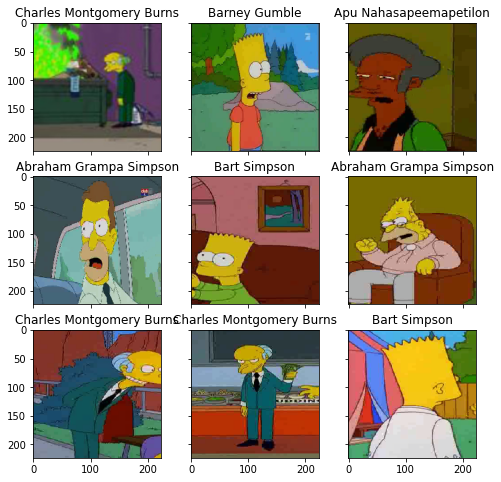

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

Можете добавить ваши любимые сцены и классифицировать их. (веселые результаты можно кидать в чат)

### Построение нейросети

Запустить данную сеть будет вашим мини-заданием на первую неделю, чтобы было проще участвовать в соревновании.

Данная архитектура будет очень простой и нужна для того, чтобы установить базовое понимание и получить простенький сабмит на Kaggle

<!-- Здесь вам предлагается дописать сверточную сеть глубины 4/5.  -->

*Описание слоев*:



1. размерность входа: 3x224x224 
2.размерности после слоя:  8x111x111
3. 16x54x54
4. 32x26x26
5. 64x12x12
6. выход: 96x5x5


#### *внесены изменения в исходную сеть*

In [16]:
# Очень простая сеть
class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.BatchNorm2d(8), #
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.BatchNorm2d(16), #
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.BatchNorm2d(32), #
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64), #
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.BatchNorm2d(96), #
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [17]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [18]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [19]:
def train(train_files, val_files, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.AdamW(model.parameters()) # изменили на AdamW
        criterion = nn.CrossEntropyLoss()
        scheduler = lr_scheduler.StepLR(opt, step_size=7, gamma=0.1) #

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            scheduler.step()
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [20]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)
print("we will classify :{}".format(n_classes))
print(simple_cnn)

we will classify :42
SimpleCnn(
  (conv1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

Запустим обучение сети.

In [31]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [ ]:
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=25, batch_size=64)

epoch:   0%|          | 0/25 [00:00<?, ?it/s]

loss 0.8189142828147437


epoch:   4%|▍         | 1/25 [02:49<1:07:40, 169.17s/it]


Epoch 001 train_loss: 0.8189     val_loss 0.8458 train_acc 0.7762 val_acc 0.7705
loss 0.5866566903576425


epoch:   8%|▊         | 2/25 [05:38<1:04:49, 169.12s/it]


Epoch 002 train_loss: 0.5867     val_loss 0.6970 train_acc 0.8390 val_acc 0.8110
loss 0.4545358289115041


epoch:  12%|█▏        | 3/25 [08:26<1:01:55, 168.87s/it]


Epoch 003 train_loss: 0.4545     val_loss 0.6849 train_acc 0.8726 val_acc 0.8290
loss 0.3663906807944732


epoch:  16%|█▌        | 4/25 [11:13<58:51, 168.16s/it]


Epoch 004 train_loss: 0.3664     val_loss 0.7463 train_acc 0.8941 val_acc 0.8217
loss 0.2992512658281124


epoch:  20%|██        | 5/25 [14:02<56:08, 168.41s/it]


Epoch 005 train_loss: 0.2993     val_loss 0.6552 train_acc 0.9132 val_acc 0.8363
loss 0.2472010281052519


epoch:  24%|██▍       | 6/25 [16:51<53:21, 168.48s/it]


Epoch 006 train_loss: 0.2472     val_loss 0.6577 train_acc 0.9268 val_acc 0.8439
loss 0.2125481442523478


epoch:  28%|██▊       | 7/25 [19:39<50:30, 168.33s/it]


Epoch 007 train_loss: 0.2125     val_loss 0.7711 train_acc 0.9385 val_acc 0.8349
loss 0.09965490511266113


epoch:  32%|███▏      | 8/25 [22:25<47:32, 167.77s/it]


Epoch 008 train_loss: 0.0997     val_loss 0.6235 train_acc 0.9743 val_acc 0.8699
loss 0.06672084801166223


epoch:  36%|███▌      | 9/25 [25:12<44:38, 167.43s/it]


Epoch 009 train_loss: 0.0667     val_loss 0.6356 train_acc 0.9835 val_acc 0.8743
loss 0.04921479192309979


epoch:  40%|████      | 10/25 [27:57<41:37, 166.48s/it]


Epoch 010 train_loss: 0.0492     val_loss 0.6546 train_acc 0.9880 val_acc 0.8754
loss 0.046737567910261194


epoch:  44%|████▍     | 11/25 [30:42<38:47, 166.24s/it]


Epoch 011 train_loss: 0.0467     val_loss 0.6736 train_acc 0.9894 val_acc 0.8760
loss 0.034603339488058


epoch:  48%|████▊     | 12/25 [33:28<35:58, 166.05s/it]


Epoch 012 train_loss: 0.0346     val_loss 0.7085 train_acc 0.9927 val_acc 0.8756
loss 0.030022387766647146


epoch:  52%|█████▏    | 13/25 [36:12<33:05, 165.49s/it]


Epoch 013 train_loss: 0.0300     val_loss 0.7240 train_acc 0.9945 val_acc 0.8752
loss 0.023976878519156638


epoch:  56%|█████▌    | 14/25 [38:57<30:19, 165.44s/it]


Epoch 014 train_loss: 0.0240     val_loss 0.7607 train_acc 0.9961 val_acc 0.8777
loss 0.01906959992843691


epoch:  60%|██████    | 15/25 [41:43<27:34, 165.49s/it]


Epoch 015 train_loss: 0.0191     val_loss 0.7581 train_acc 0.9971 val_acc 0.8764
loss 0.017906342948729906


epoch:  64%|██████▍   | 16/25 [44:28<24:47, 165.32s/it]


Epoch 016 train_loss: 0.0179     val_loss 0.7607 train_acc 0.9973 val_acc 0.8756
loss 0.01644038498170042


epoch:  68%|██████▊   | 17/25 [47:12<22:00, 165.09s/it]


Epoch 017 train_loss: 0.0164     val_loss 0.7623 train_acc 0.9978 val_acc 0.8770
loss 0.01744543234263786


epoch:  72%|███████▏  | 18/25 [49:58<19:16, 165.25s/it]


Epoch 018 train_loss: 0.0174     val_loss 0.7674 train_acc 0.9973 val_acc 0.8771
loss 0.014534860924602929


epoch:  76%|███████▌  | 19/25 [52:43<16:31, 165.23s/it]


Epoch 019 train_loss: 0.0145     val_loss 0.7739 train_acc 0.9981 val_acc 0.8762
loss 0.016319000034045072


epoch:  80%|████████  | 20/25 [55:28<13:44, 164.98s/it]


Epoch 020 train_loss: 0.0163     val_loss 0.7803 train_acc 0.9978 val_acc 0.8768
loss 0.014147812701050788


epoch:  84%|████████▍ | 21/25 [58:12<10:59, 164.88s/it]


Epoch 021 train_loss: 0.0141     val_loss 0.7850 train_acc 0.9980 val_acc 0.8760
loss 0.012855093629862095


epoch:  88%|████████▊ | 22/25 [1:00:57<08:14, 164.86s/it]


Epoch 022 train_loss: 0.0129     val_loss 0.7860 train_acc 0.9980 val_acc 0.8764
loss 0.013612058077509885


epoch:  92%|█████████▏| 23/25 [1:03:40<05:28, 164.40s/it]


Epoch 023 train_loss: 0.0136     val_loss 0.7868 train_acc 0.9980 val_acc 0.8766
loss 0.013485588175951769


epoch:  96%|█████████▌| 24/25 [1:06:25<02:44, 164.53s/it]


Epoch 024 train_loss: 0.0135     val_loss 0.7872 train_acc 0.9983 val_acc 0.8766
loss 0.013392319763878672


epoch: 100%|██████████| 25/25 [1:09:10<00:00, 166.03s/it]


Epoch 025 train_loss: 0.0134     val_loss 0.7879 train_acc 0.9980 val_acc 0.8764


Построим кривые обучения

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

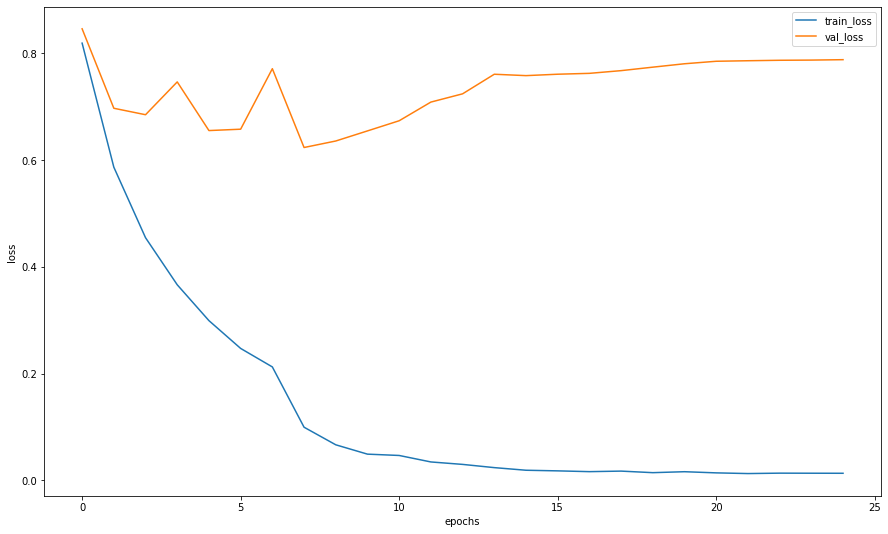

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Ну и что теперь со всем этим делать?

![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

Хорошо бы понять, как сделать сабмит. 
У нас есть сеть и методы eval у нее, которые позволяют перевести сеть в режим предсказания. Стоит понимать, что у нашей модели на последнем слое стоит softmax, которые позволяет получить вектор вероятностей  того, что объект относится к тому или иному классу. Давайте воспользуемся этим.

In [32]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [ ]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(simple_cnn, ex_img.unsqueeze(0))

In [ ]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(simple_cnn, imgs)

In [41]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [ ]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

In [ ]:
actual_labels

[0, 6, 4, 2, 4, 6, 4, 4, 2, 1, 4, 4, 4, 0, 5, 0, 2, 6, 0, 4]

In [ ]:
preds_class

['abraham_grampa_simpson',
 'charles_montgomery_burns',
 'bart_simpson',
 'apu_nahasapeemapetilon',
 'bart_simpson',
 'charles_montgomery_burns',
 'bart_simpson',
 'bart_simpson',
 'apu_nahasapeemapetilon',
 'chief_wiggum',
 'moe_szyslak',
 'bart_simpson',
 'bart_simpson',
 'abraham_grampa_simpson',
 'chief_wiggum',
 'abraham_grampa_simpson',
 'apu_nahasapeemapetilon',
 'charles_montgomery_burns',
 'abraham_grampa_simpson',
 'bart_simpson']

In [ ]:
y_pred

array([ 0,  6,  4,  2,  4,  6,  4,  4,  2,  7, 27,  4,  4,  0,  7,  0,  2,
        6,  0,  4])

Обратите внимание, что метрика, которую необходимо оптимизировать в конкурсе --- f1-score. Вычислим целевую метрику на валидационной выборке.

In [ ]:
from sklearn.metrics import f1_score

f1_score(actual_labels, y_pred, average='micro')


0.85

Сделаем классную визуализацию,  чтобы посмотреть насколько сеть уверена в своих ответах. Можете исспользовать это, чтобы отлаживать правильность вывода.

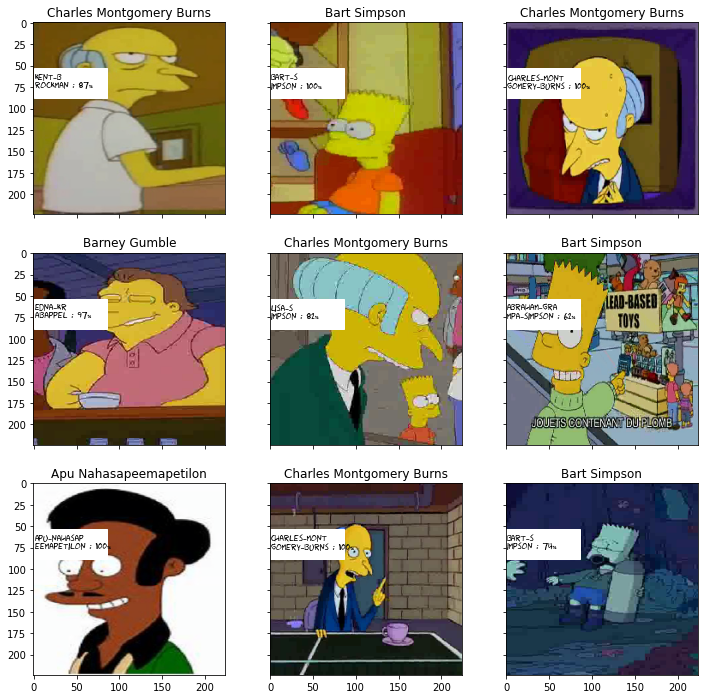

In [ ]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(simple_cnn, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

### Submit на Kaggle

![alt text](https://i.redd.it/nuaphfioz0211.jpg)

In [ ]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(simple_cnn, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]


In [ ]:
! ls 

characters_illustration.png  label_encoder.pkl	sample_submission.csv  train
gdrive			     sample_data	testset


In [ ]:
import pandas as pd
df = pd.DataFrame()
df['Id'] = test_filenames
df['Expected'] = preds
df.to_csv('gdrive/My Drive/simpsons_simple_cnn_baseline_changing.csv', index=False)

In [ ]:
# my_submit = pd.read_csv("journey-springfield/journey-springfield/sample_submission.csv")#sample_submission
my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
my_submit.head(10)

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon
5,img102.jpg,kent_brockman
6,img103.jpg,edna_krabappel
7,img104.jpg,chief_wiggum
8,img105.jpg,lisa_simpson
9,img106.jpg,kent_brockman


In [ ]:
my_submit = pd.read_csv("gdrive/My Drive/simpsons_simple_cnn_baseline_changing.csv")
# my_submit = pd.DataFrame({'Image_id': test_filenames, 'Expected': preds})
my_submit.head()

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon


In [ ]:
len(my_submit)

991

Второй сабмит с внесенными изменениями в исходную сеть

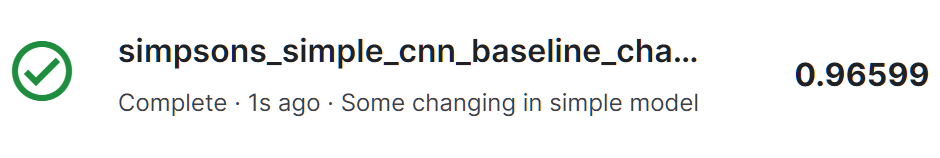

## Приключение?

А теперь самое интересное, мы сделали простенькую сверточную сеть и смогли отправить сабмит, но получившийся скор нас явно не устраивает. Надо с этим что-то сделать. 

Несколько срочныйх улучшейни для нашей сети, которые наверняка пришли Вам в голову: 


*   Учим дольше и изменяем гиперпараметры сети
*  learning rate, batch size, нормализация картинки и вот это всё
*   Кто же так строит нейронные сети? А где пулинги и батч нормы? Надо добавлять
*  Ну разве Адам наше все? [adamW](https://www.fast.ai/2018/07/02/adam-weight-decay/) для практика, [статейка для любителей](https://openreview.net/pdf?id=ryQu7f-RZ) (очень хороший анализ), [наши ](https://github.com/MichaelKonobeev/adashift/) эксперименты для заинтересованных.

* Ну разве это deep learning? Вот ResNet и Inception, которые можно зафайнтьюнить под наши данные, вот это я понимаю (можно и обучить в колабе, а можно и [готовые](https://github.com/Cadene/pretrained-models.pytorch) скачать).

* Данных не очень много, можно их аугументировать и  доучититься на новом датасете ( который уже будет состоять из, как  пример аугументации, перевернутых изображений)

* Стоит подумать об ансамблях


Надеюсь, что у Вас получится!

![alt text](https://s11.favim.com/orig/7/763/7637/76376/study-tired-lisa-Favim.com-7637635.jpg)


### Пример из семинара (AlexNet)

In [22]:
import os
from tqdm.autonotebook import tqdm, trange

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time

Загрузка модели

In [42]:
from torchvision import models
model = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [43]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
n_classes = len(np.unique(train_val_labels))
n_classes

42

Fine Tuning способ

In [ ]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier = nn.Linear(num_features, n_classes)

In [ ]:
model = model.to(DEVICE)

In [ ]:
history_alex = train(train_dataset, val_dataset, model=model, epochs=30, batch_size=64)

epoch:   0%|          | 0/30 [00:00<?, ?it/s]

loss 1.8369542365697122


epoch:   3%|▎         | 1/30 [02:47<1:20:43, 167.01s/it]


Epoch 001 train_loss: 1.8370     val_loss 1.1884 train_acc 0.5033 val_acc 0.6878
loss 0.8736717780195715


epoch:   7%|▋         | 2/30 [05:34<1:17:59, 167.11s/it]


Epoch 002 train_loss: 0.8737     val_loss 0.8281 train_acc 0.7668 val_acc 0.7810
loss 0.633090010873299


epoch:  10%|█         | 3/30 [08:20<1:15:01, 166.71s/it]


Epoch 003 train_loss: 0.6331     val_loss 0.6962 train_acc 0.8282 val_acc 0.8200
loss 0.4932550861354208


epoch:  13%|█▎        | 4/30 [11:05<1:11:52, 165.88s/it]


Epoch 004 train_loss: 0.4933     val_loss 0.7748 train_acc 0.8664 val_acc 0.8141
loss 0.42341420882404573


epoch:  17%|█▋        | 5/30 [13:50<1:09:05, 165.81s/it]


Epoch 005 train_loss: 0.4234     val_loss 0.6533 train_acc 0.8818 val_acc 0.8351
loss 0.38121951582006713


epoch:  20%|██        | 6/30 [16:35<1:06:10, 165.46s/it]


Epoch 006 train_loss: 0.3812     val_loss 0.6211 train_acc 0.8947 val_acc 0.8538
loss 0.3458644093183936


epoch:  23%|██▎       | 7/30 [19:18<1:03:09, 164.76s/it]


Epoch 007 train_loss: 0.3459     val_loss 0.6540 train_acc 0.9052 val_acc 0.8550


In [ ]:
loss, acc, val_loss, val_acc = zip(*history_alex)

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

Feature Extractor

In [ ]:
model_AlexNet_extractor = models.alexnet(pretrained=True)

In [ ]:
for param in model_AlexNet_extractor.parameters():
    print(param.requires_grad)

In [ ]:
# замораживаем параметры (веса)
for param in model_AlexNet_extractor.parameters():
    param.requires_grad = False
    
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model_AlexNet_extractor.classifier = nn.Linear(num_features, n_classes)

In [ ]:
model_AlexNet_extractor =model_AlexNet_extractor.to(DEVICE)

In [ ]:
history = train(train_dataset, val_dataset, model=model_AlexNet_extractor, epochs=30, batch_size=64)

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Inception v3

In [17]:
model_inception_v3 = models.inception_v3(pretrained=True)
model_inception_v3.aux_logits=False

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

In [18]:
for param in model_inception_v3.parameters():
    param.requires_grad = False

In [26]:
n_classes = len(np.unique(train_val_labels))

In [20]:
n_classes = len(np.unique(train_val_labels))
# Handle the auxilary net
num_ftrs = model_inception_v3.AuxLogits.fc.in_features
model_inception_v3.AuxLogits.fc = nn.Linear(num_ftrs, n_classes)
# Handle the primary net
num_ftrs = model_inception_v3.fc.in_features
model_inception_v3.fc = nn.Linear(num_ftrs,  n_classes)

print(model_inception_v3)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [21]:
model_inception_v3 = model_inception_v3.to(DEVICE)

In [22]:
# все изображения будут масштабированы к размеру 299x299 (особенность, так обучался inception)
RESCALE_SIZE = 299

In [30]:
history_inception = train(train_dataset, val_dataset, model=model_inception_v3, epochs=30, batch_size=32)

epoch:   0%|          | 0/30 [00:00<?, ?it/s]

loss 2.3689684661089734

Epoch 001 train_loss: 2.3690     val_loss 1.7596 train_acc 0.3635 val_acc 0.5806
loss 1.50372189439416

Epoch 002 train_loss: 1.5037     val_loss 1.4280 train_acc 0.6244 val_acc 0.6341
loss 1.1985452957757454

Epoch 003 train_loss: 1.1985     val_loss 1.2428 train_acc 0.6927 val_acc 0.6752
loss 1.0233849592782622

Epoch 004 train_loss: 1.0234     val_loss 1.1463 train_acc 0.7265 val_acc 0.7039
loss 0.9070128403398533

Epoch 005 train_loss: 0.9070     val_loss 1.1398 train_acc 0.7572 val_acc 0.7016
loss 0.8246436666641974

Epoch 006 train_loss: 0.8246     val_loss 1.0820 train_acc 0.7780 val_acc 0.7113
loss 0.7632851476646227

Epoch 007 train_loss: 0.7633     val_loss 1.0588 train_acc 0.7880 val_acc 0.7207
loss 0.64335364878227

Epoch 008 train_loss: 0.6434     val_loss 1.0016 train_acc 0.8374 val_acc 0.7346
loss 0.6353584484724765

Epoch 009 train_loss: 0.6354     val_loss 1.0042 train_acc 0.8387 val_acc 0.7306
loss 0.6294895700948528

Epoch 010 train_loss: 0.6

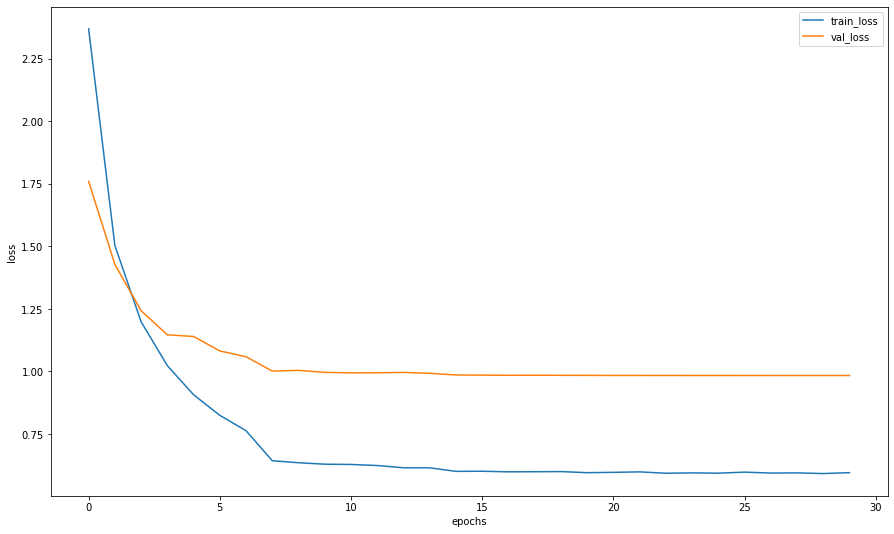

In [31]:
loss, acc, val_loss, val_acc = zip(*history_inception)
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [38]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(model_inception_v3, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]

In [39]:
import pandas as pd
df = pd.DataFrame()
df['Id'] = test_filenames
df['Expected'] = preds
df.to_csv('gdrive/My Drive/simpsons_simple_cnn_baseline_inception_v3.csv', index=False)

In [40]:
# my_submit = pd.read_csv("journey-springfield/journey-springfield/sample_submission.csv")#sample_submission
my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
my_submit.head(10)

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon
5,img102.jpg,kent_brockman
6,img103.jpg,edna_krabappel
7,img104.jpg,chief_wiggum
8,img105.jpg,lisa_simpson
9,img106.jpg,kent_brockman


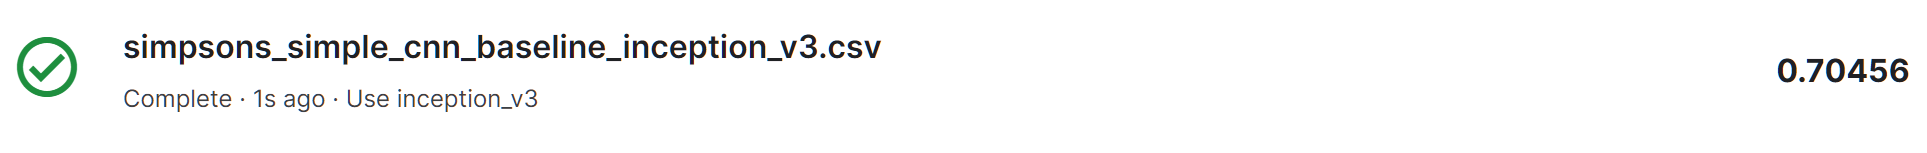

In [33]:
model_inception_v3 = models.inception_v3(pretrained=True)
model_inception_v3.aux_logits=False

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.


In [34]:
# размораживаем два последних слоя
for param in model_inception_v3.parameters():
    param.requires_grad = False

for param in model_inception_v3.Mixed_7b.parameters():
    param.requires_grad = True
    
for param in model_inception_v3.Mixed_7c.parameters():
    param.requires_grad = True    

In [35]:
# Handle the auxilary net
num_ftrs = model_inception_v3.AuxLogits.fc.in_features
model_inception_v3.AuxLogits.fc = nn.Linear(num_ftrs, n_classes)
# Handle the primary net
num_ftrs = model_inception_v3.fc.in_features
model_inception_v3.fc = nn.Linear(num_ftrs,  n_classes)

print(model_inception_v3)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [36]:
model_inception_v3 = model_inception_v3.to(DEVICE)

In [37]:
RESCALE_SIZE = 299

In [38]:
history_3 = train(train_dataset, val_dataset, model=model_inception_v3, epochs=30, batch_size=64)

epoch:   0%|          | 0/30 [00:00<?, ?it/s]

loss 0.7156122889789975

Epoch 001 train_loss: 0.7156     val_loss 0.3591 train_acc 0.8292 val_acc 0.9066
loss 0.35772300206769747

Epoch 002 train_loss: 0.3577     val_loss 0.3323 train_acc 0.9052 val_acc 0.9163
loss 0.20621923396022268

Epoch 003 train_loss: 0.2062     val_loss 0.3288 train_acc 0.9446 val_acc 0.9268
loss 0.13551448655759493

Epoch 004 train_loss: 0.1355     val_loss 0.3773 train_acc 0.9633 val_acc 0.9180
loss 0.10243099286874181

Epoch 005 train_loss: 0.1024     val_loss 0.3680 train_acc 0.9726 val_acc 0.9318
loss 0.0952417897640106

Epoch 006 train_loss: 0.0952     val_loss 0.2957 train_acc 0.9748 val_acc 0.9331
loss 0.08054344920845265

Epoch 007 train_loss: 0.0805     val_loss 0.3079 train_acc 0.9771 val_acc 0.9343
loss 0.01658690402711499

Epoch 008 train_loss: 0.0166     val_loss 0.2719 train_acc 0.9956 val_acc 0.9520
loss 0.0063167348034163535

Epoch 009 train_loss: 0.0063     val_loss 0.2818 train_acc 0.9985 val_acc 0.9519
loss 0.003521856325250136

Epoch 010 

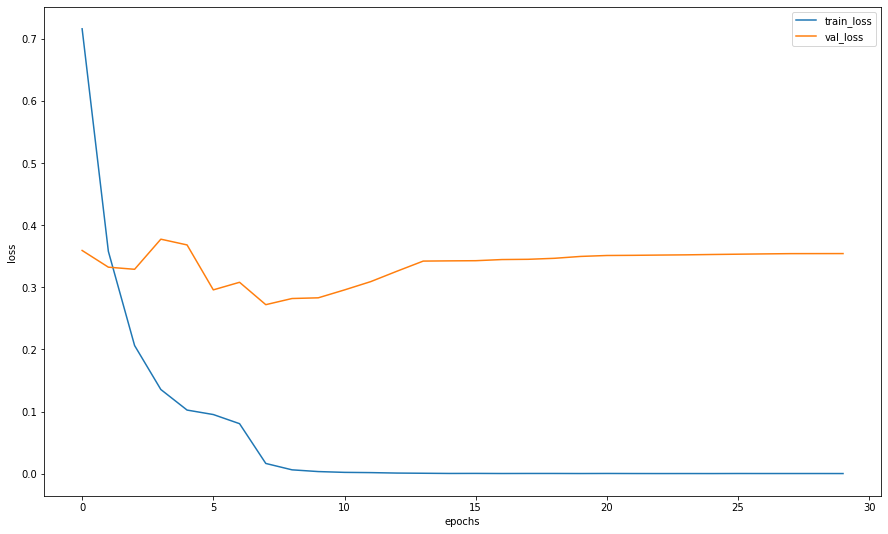

In [39]:
loss, acc, val_loss, val_acc = zip(*history_3)
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [42]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(model_inception_v3, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]

In [43]:
import pandas as pd
df = pd.DataFrame()
df['Id'] = test_filenames
df['Expected'] = preds
df.to_csv('gdrive/My Drive/simpsons_simple_cnn_baseline_inception_v3_2.csv', index=False)

In [44]:
# my_submit = pd.read_csv("journey-springfield/journey-springfield/sample_submission.csv")#sample_submission
my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
my_submit.head(10)

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon
5,img102.jpg,kent_brockman
6,img103.jpg,edna_krabappel
7,img104.jpg,chief_wiggum
8,img105.jpg,lisa_simpson
9,img106.jpg,kent_brockman


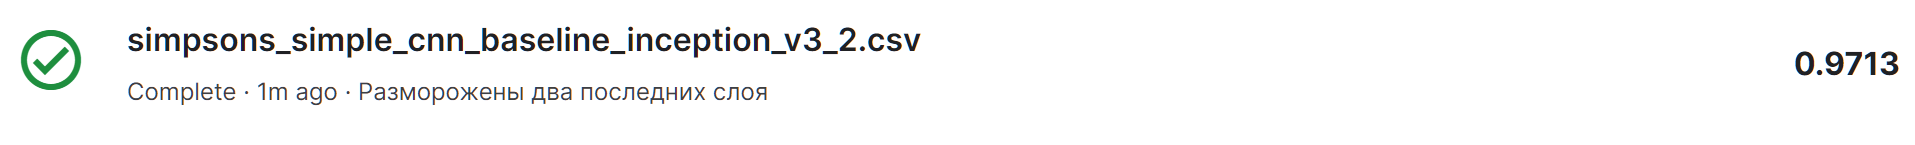